# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
         print("City not found. Skipping...")
         pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | lisakovsk
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | mocimboa
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | raja
Processing Record 8 of Set 1 | la foa
Processing Record 9 of Set 1 | fomboni
Processing Record 10 of Set 1 | howard springs
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | lerwick
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | viedma
Processing Record 17 of Set 1 | zouerate
Processing Record 18 of Set 1 | gorontalo
Processing Record 19 of Set 1 | faya-largeau
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | vallegrande
Processing Record 22 of Set 1 | bredasdorp
Pr

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,293.57,69,67,6.20,PN,1686328414
1,lisakovsk,52.5369,62.4936,289.33,51,50,3.66,KZ,1686328414
2,invercargill,-46.4000,168.3500,274.13,93,5,1.73,NZ,1686328268
3,mocimboa,-11.3167,40.3500,296.86,86,1,2.68,MZ,1686328415
4,bethel,41.3712,-73.4140,294.20,62,75,1.54,US,1686328416


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv(r'C:\Homework\python-API-challenge\WeatherPy\output_data\cities.csv', index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv(r'C:\Homework\python-API-challenge\WeatherPy\output_data\cities.csv', index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,293.57,69,67,6.20,PN,1686328414
1,lisakovsk,52.5369,62.4936,289.33,51,50,3.66,KZ,1686328414
2,invercargill,-46.4000,168.3500,274.13,93,5,1.73,NZ,1686328268
3,mocimboa,-11.3167,40.3500,296.86,86,1,2.68,MZ,1686328415
4,bethel,41.3712,-73.4140,294.20,62,75,1.54,US,1686328416


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

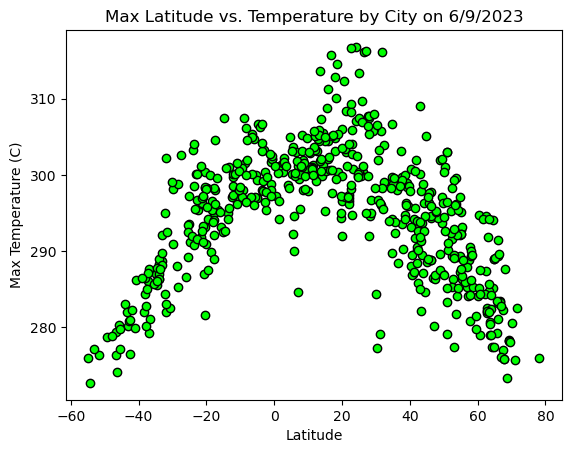

In [28]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp"].astype("float")
plt.scatter(x_values, y_values, color = "lime", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("Max Latitude vs. Temperature by City on 6/9/2023")

# Save the figure
plt.savefig(r'C:\Homework\python-API-challenge\WeatherPy\output_data\Fig1.png')

# Show plot
plt.show()

#### Latitude Vs. Humidity

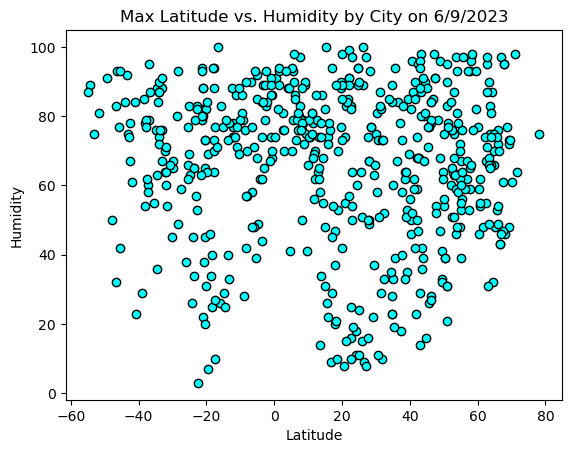

In [29]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Humidity"].astype("float")
plt.scatter(x_values, y_values, color = "cyan", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Max Latitude vs. Humidity by City on 6/9/2023")

# Save the figure
plt.savefig(r'C:\Homework\python-API-challenge\WeatherPy\output_data\Fig2.png')

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

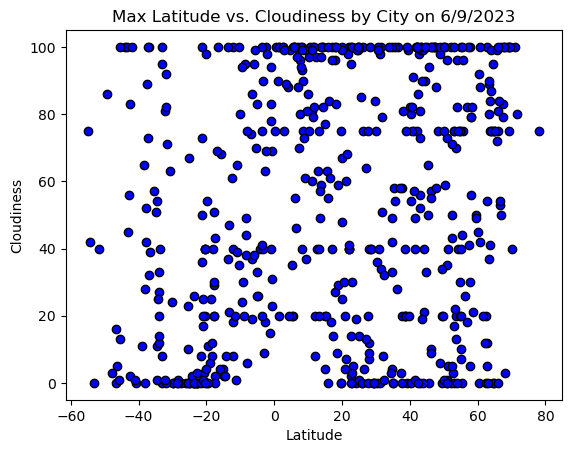

In [30]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Cloudiness"].astype("float")
plt.scatter(x_values, y_values, color = "blue", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Max Latitude vs. Cloudiness by City on 6/9/2023")

# Save the figure
plt.savefig(r'C:\Homework\python-API-challenge\WeatherPy\output_data\Fig3.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

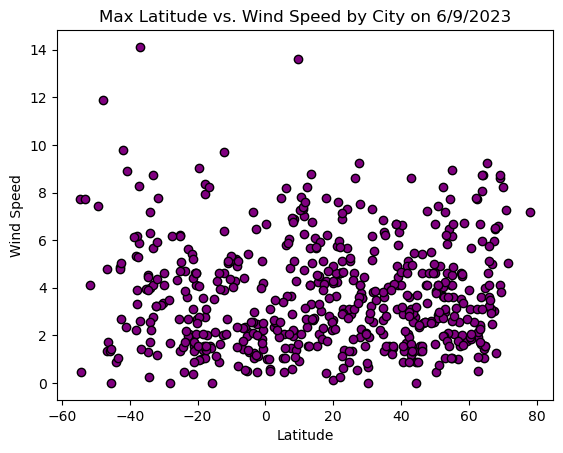

In [31]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Wind Speed"].astype("float")
plt.scatter(x_values, y_values, color = "purple", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Max Latitude vs. Wind Speed by City on 6/9/2023")

# Save the figure
plt.savefig(r'C:\Homework\python-API-challenge\WeatherPy\output_data\Fig4.png')

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = 

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE